In [ ]:
import sys
import importlib
sys.path.append('../PyScripts/')

import utils.function_library 
importlib.reload(utils.function_library)
from utils.function_library import *

In [1]:
import sys
import importlib
sys.path.append('../pycharmProject1/')
# same as: sys.path.append('/home/andrea/ownCloud2/laptop/pycharmProject1/')

import utils.function_library 
importlib.reload(utils.function_library)
from utils.function_library import *

In [1]:
def run_chi2tests(Ntests):
    
    for i in range(Ntests):
        test_number = str(i)
        simulation = "test_"+test_number
        ini_filename = '../CosmoCov/covs/chi2tests/test_'+test_number+'.ini'
        
        #creates directories and saves inifile to simulation_settings as well
        setup_simulation(simulation)
        
        #set directory and simulation name in ini_file 
        edit_ini_file(ini_filename, 'output/default', 'output/' + simulation)
        edit_ini_file(ini_filename, 'simulation : default', 'simulation : ' + simulation)
        
        #chi2tests/test_$test_number.ini
        
        #runs simulation with Cosmolike 
        run_covs = subprocess.run(['./chi2tests.sh', test_number],
                                  cwd='../CosmoCov/covs/',
                                  stdout=subprocess.PIPE,
                                  universal_newlines=True)
        
        # If the program has run correctly, it will print the last part of the output, saying PROGRAM EXECUTED.
        print(run_covs.stdout[-54:])

In [30]:
Nsamples = 49
run_chi2tests(Nsamples)

In [89]:

#DATA VECTOR
#kids_file = np.loadtxt("../KiDS1000_cosmis_shear_data_release/data_fits/data_xipm")
#data_xipm = np.reshape(kids_file[:,1], (-1,1))
fake_data_vector = np.load("fake_datavectors.npy")[225] #for example, Number 225
data_xipm = np.reshape(fake_data_vector, (-1,1))

chi_tests = []

for i in range(Nsamples):
    test_number = str(i)
    simulation = "test_"+test_number
    xipm_directory = "../CosmoCov/covs/xipm/" + simulation +"/"
    create_theory_vector(xipm_directory, simulation)
    mu_cosmolike = np.reshape(np.load("../CosmoCov/covs/xipm/{}/"
                                      "vector_xipm_kids_{}.npy".format(simulation,simulation)), (-1,1))

    chi_tests.append(chi_square_test(kids_covmat, mu_cosmolike, data_xipm))

chi_tests_array = np.array(chi_tests)

Minimum chi-square to reject null hypothesis: 256.141

chi-squared = 219.547, p-value = array([[0.50546742]])
chi-squared reduced from kids is 260, and p value is 0.034

Minimum chi-square to reject null hypothesis: 256.141

chi-squared = 224.025, p-value = array([[0.42126384]])
chi-squared reduced from kids is 260, and p value is 0.034

Minimum chi-square to reject null hypothesis: 256.141

chi-squared = 211.518, p-value = array([[0.65608699]])
chi-squared reduced from kids is 260, and p value is 0.034

Minimum chi-square to reject null hypothesis: 256.141

chi-squared = 214.925, p-value = array([[0.59324878]])
chi-squared reduced from kids is 260, and p value is 0.034

Minimum chi-square to reject null hypothesis: 256.141

chi-squared = 207.602, p-value = array([[0.72397631]])
chi-squared reduced from kids is 260, and p value is 0.034

Minimum chi-square to reject null hypothesis: 256.141

chi-squared = 223.908, p-value = array([[0.42340549]])
chi-squared reduced from kids is 260, an

In [103]:
#Retrieve parameters from the ini_files

omega_list = []
sigma8_list = []
ns_list = []
omegab_list = []
h0_list = []
Aia_list = []

for i in range(Nsamples):
    
    ini_filename = '../CosmoCov/covs/chi2tests/test_'+str(i)+'.ini'
    parameters = list(get_cosmological_parameters(ini_filename, N_parameters=10).values())
    
    omega_list.append(parameters[4])
    sigma8_list.append(parameters[5])
    ns_list.append(parameters[6])
    omegab_list.append(parameters[7])
    h0_list.append(parameters[8])
    Aia_list.append(parameters[9])
    
omega_array = np.array(omega_list)
sigma8_array = np.array(sigma8_list)
ns_array = np.array(ns_list)
omegab_array = np.array(omegab_list)
h0_array = np.array(h0_list)
Aia_array = np.array(Aia_list)    

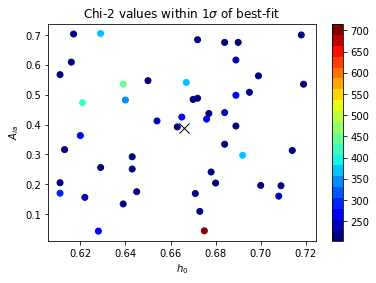

In [119]:
discrete_cmap = matplotlib.cm.get_cmap("jet", 20)
plt.xlabel(r'$h_0$')
plt.ylabel(r'$A_{ia}$')
plt.title(r'Chi-2 values within $1\sigma$ of best-fit')
plt.plot(bestfit_values[4], bestfit_values[5], 'x', markersize=10, c='black')
plt.scatter(h0_array, Aia_array, c=chi_tests_array, cmap = discrete_cmap)
cbar = plt.colorbar()
cbar.ax.locator_params(nbins=20)

#### How to write multiple lines into a file

In [ ]:
my_file = open("test_file.txt", "w")

text_list = ["ab\n", "cd\n", "ef"]

my_file.writelines(text_list)

my_file = open("test_file.txt")

content = my_file.read()

my_file.close()

#### How to write at the beginning of  a file

In [ ]:
filename = '../CosmoCov/covs/chi2tests/test_'+str(i)+'.ini'
with open(filename, "r+") as f:
    old = f.read() # read everything in the file
    f.seek(0) # rewind
    f.write("new line\n" + old) # write the new line before


#### Create several inifiles for chi2tests

In [ ]:
flag = False ####DONT RUN AGAIN, NO NEED

if flag:
    bestfit_names = np.array(['Omega_m', 'sigma_8', 'n_spec', 'omb', 'h0', 'A_ia'])
    bestfit_values = np.array([0.223, 0.887, 0.927, 0.043, 0.666, 0.387 ])
    #1 sigma errors
    onesigmas = K1000_standard_dev_symmetrized()

    for i in range(1,Nsamples):
        new_lines = ['Omega_v : 0.69\n', 'w0 : -1.0\n', 'wa : 0.0\n', 'IA : 1\n']

        for j in range(len(bestfit_names)):
            new_value = np.random.uniform(bestfit_values[j]-onesigmas[j], bestfit_values[j] + onesigmas[j])
            new_lines.append(bestfit_names[j]+' : '+str(round(new_value,3))+'\n')

        filename = '../CosmoCov/covs/chi2tests/test_'+str(i)+'.ini'
        with open(filename, "r+") as f:
            old = f.read() # read everything in the file
            f.seek(0) # rewind
            f.writelines(new_lines) # write the new line before
            f.writelines(old)    